# #100Viz 02: Recently Arrived Education

Source: American Community Survey, 2001-2016 <br>
Notes: Foreign-born Californians ages 18-65 who have arrived to the state within the last 5 years.

***
**Set up**

In [1]:
import altair as alt

%run "scripts/cimarron_theme_mod.py"

In [2]:
%%html
<style>
@import url("https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono");
</style>

In [3]:
df = alt.pd.read_csv('../data/raw/recent_arrivals.csv', index_col = 0,)

df.head()

,year,bpld,agg educd,perwt
0,1980-01-01,Canada,Ba Or More,2540.0
1,1980-01-01,Canada,Less Than Hs,3600.0
2,1980-01-01,Canada,Some College,3280.0
3,1980-01-01,St. Pierre And Miquelon,Less Than Hs,20.0
4,1980-01-01,Bermuda,Some College,20.0


***
#### Cleaning up a little:

1. More descriptive column names
2. More descriptive values 
3. years 2001-2016, to keep it only ACS for consistency.

In [4]:
df.columns = ['year', 'birthplace', 'education level', 'number of people']

In [5]:
rename_educ = {"Ba Or More": "Bachelor's or higher", "Less Than Hs": "Less than high school", "Some College": "Some college", "Hs": "Graduated high school"}
df['education level'] = df['education level'].map(rename_educ)

In [6]:
df = df[df['year'] >= "2001-01-01"].copy()

***

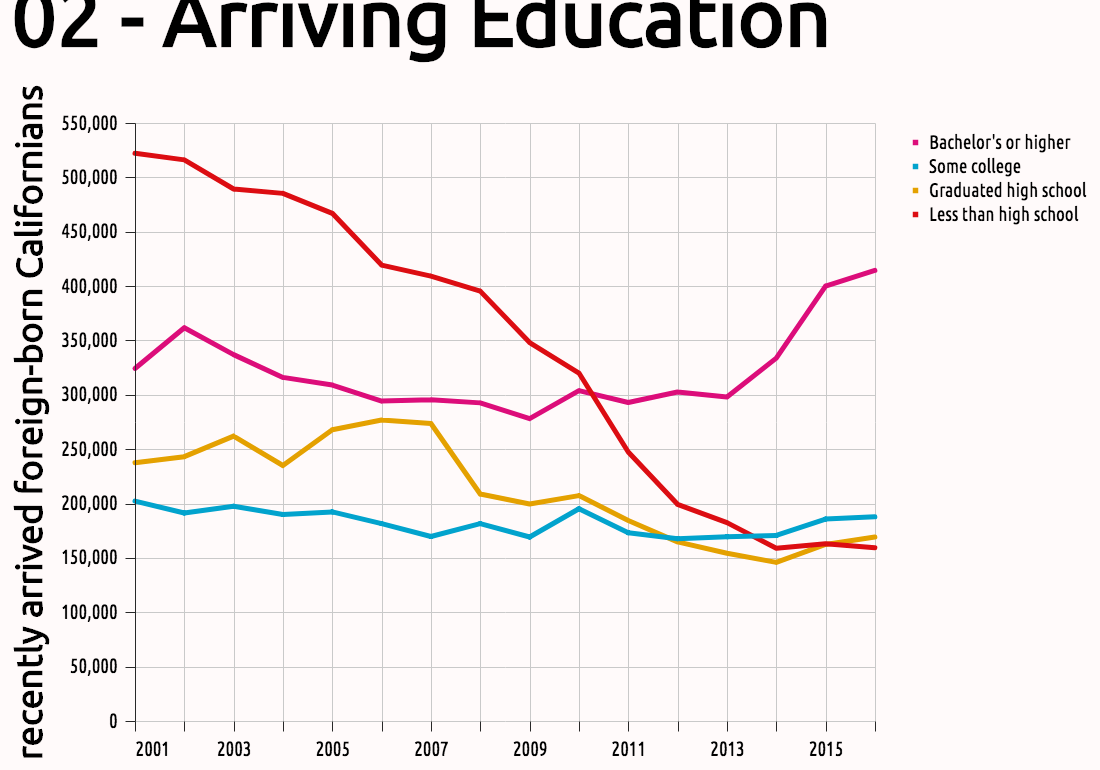

In [7]:
base = alt.Chart(df.groupby(["year","education level"]).sum().reset_index()).mark_trail().encode(
    x = alt.X('year:T', scale = alt.Scale(domain=("2001-01-01", "2016-01-02"))),
    y = alt.Y('number of people:Q', axis = alt.Axis(title = "recently arrived foreign-born Californians", tickCount = 10),),
    color = alt.Color("education level:N", sort = ["Bachelor's or higher", "Some college", "Graduated high school", "Less than high school"], legend = alt.Legend(title = "", values = ["Bachelor's or higher", "Some college", "Graduated high school", "Less than high school"])),
).properties(
    title = "02 - Arriving Education",
    height = 750,
    width = 1080,
)

base

***
Let's look at the top 5 of 2016

We first group by year and birthplace, we grab the column `number of people` and we add the values. Put that into a dataframe. Sort it by year and number of people. Grab the first 5, grab the birthplace values, put it in a list.

In [8]:
top_5 = list(df.groupby(["year", "birthplace"])["number of people"].sum().to_frame().sort_values(["year", "number of people"], ascending = False).head(5).reset_index()['birthplace'].unique())
top_5

['China', 'Mexico', 'India', 'Philippines', 'Vietnam']

In [9]:
df_top5 = df[df['birthplace'].isin(top_5)].copy()

In [10]:
# cleaning up for axis:
df["year"] = df['year'].str[:4]

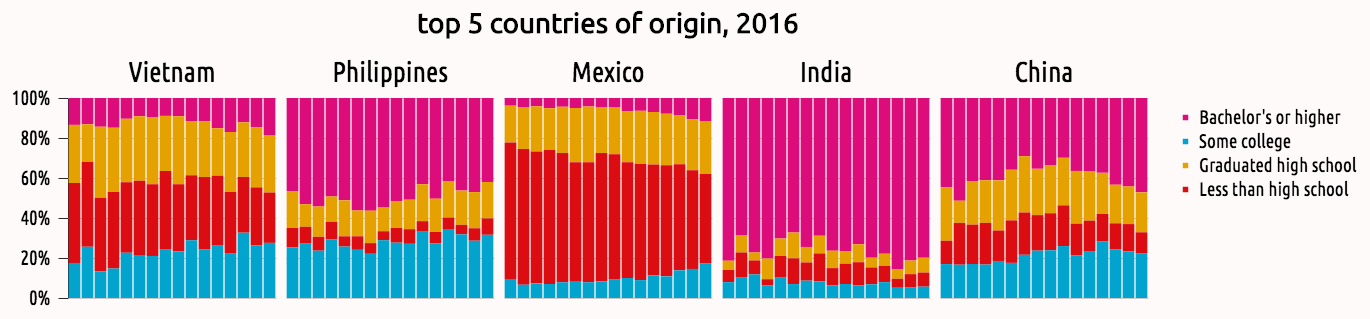

In [11]:
lower = alt.Chart(df_top5).mark_bar().encode(
    x = alt.X("year:O", axis = alt.Axis(format = "%Y", labels = False, ticks = False,)),
    y = alt.Y("number of people:Q", stack = "normalize", axis = alt.Axis(format = "%", title = "",)),
    color = alt.Color("education level:N", sort = ["Bachelor's or higher", "Some college", "Graduated high school", "Less than high school"], legend = alt.Legend(title = ""),),
).properties(
    width = 208,
    height = 200,
).facet(
    column = alt.Column("birthplace", title = "top 5 countries of origin, 2016", sort = "descending",),
)

lower

In [12]:
source = "SOURCE: American Community Survey, 2001-2016."
notes = "NOTES: Foreign-born Californians ages 18-65 who have arrived to the state within the last 5 years."

        
source_chart = alt.Chart(df).mark_text(text = source, dx = 540, size = 18).properties(
    height = 20,
    width = 1080,
)

notes_chart = alt.Chart(df).mark_text(text = notes, dx = 540, size = 18).properties(
    height = 20,
    width = 1080,
)


In [13]:
# too many rows
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

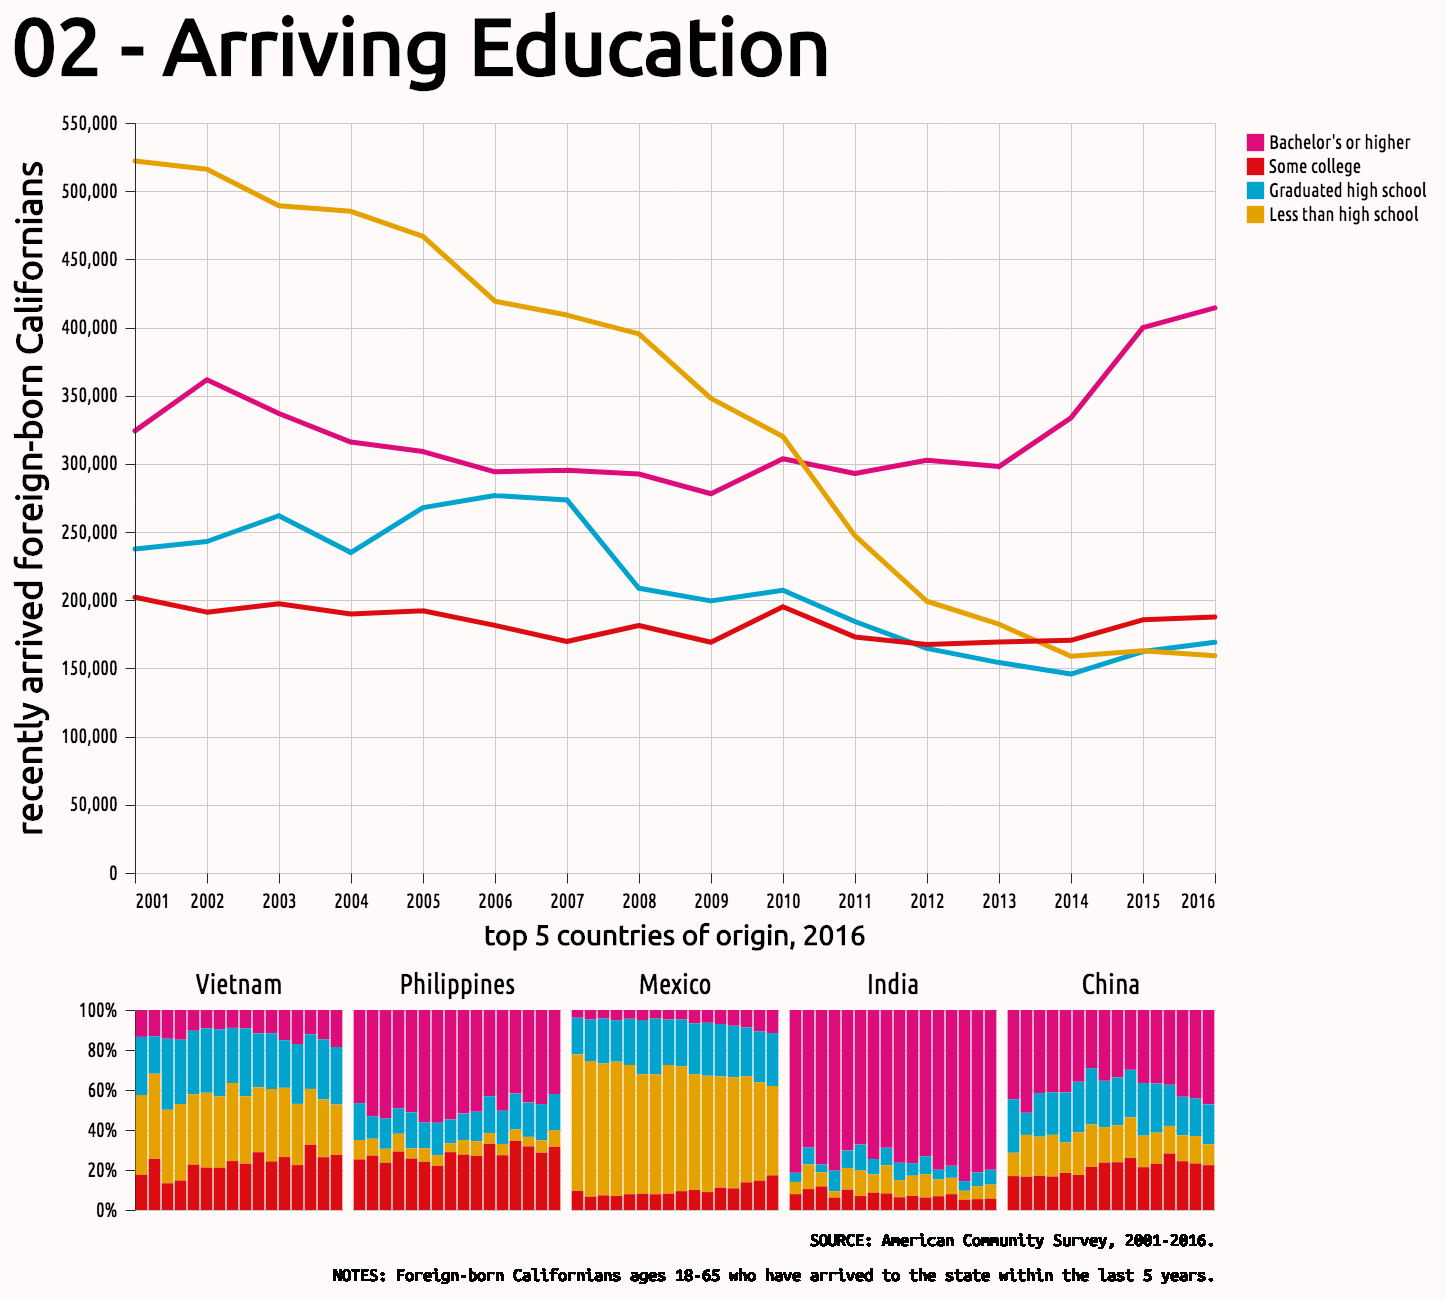

In [14]:
final = alt.vconcat(base, lower, source_chart, notes_chart).resolve_legend(
    color = "shared",
)

final.configure_legend(symbolSize = 300, )

## 